<a href="https://colab.research.google.com/github/yiyichanmyae/CNN/blob/main/horse_human_detection_cnn_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 8s (53.5 MB/s)
(Reading database ... 155676 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155654 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+c

Run the code below to download the compressed dataset `horse-or-human.zip`.

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-08-22 14:28:36--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 172.217.13.80, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   196MB/s    in 0.7s    

2022-08-22 14:28:37 (196 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# unzip datafolder

import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horsde-or-human')
zip_ref.close()

In [4]:
import os

# directory with training horse pictures
train_horse_dir = os.path.join('./horsde-or-human/horses')

# directory with training horse pictures
train_human_dir = os.path.join('./horsde-or-human/humans')


In [5]:
# list the pic under the directories

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse12-8.png', 'horse25-0.png', 'horse12-7.png', 'horse07-1.png', 'horse06-8.png', 'horse02-8.png', 'horse24-2.png', 'horse17-1.png', 'horse31-2.png', 'horse46-4.png']
['human17-08.png', 'human11-23.png', 'human12-10.png', 'human14-06.png', 'human10-08.png', 'human03-23.png', 'human14-22.png', 'human10-05.png', 'human16-29.png', 'human15-01.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


next horse pix : ['./horsde-or-human/horses/horse12-8.png', './horsde-or-human/horses/horse25-0.png', './horsde-or-human/horses/horse12-7.png', './horsde-or-human/horses/horse07-1.png', './horsde-or-human/horses/horse06-8.png', './horsde-or-human/horses/horse02-8.png', './horsde-or-human/horses/horse24-2.png', './horsde-or-human/horses/horse17-1.png']
next human pix : ['./horsde-or-human/humans/human17-08.png', './horsde-or-human/humans/human11-23.png', './horsde-or-human/humans/human12-10.png', './horsde-or-human/humans/human14-06.png', './horsde-or-human/humans/human10-08.png', './horsde-or-human/humans/human03-23.png', './horsde-or-human/humans/human14-22.png', './horsde-or-human/humans/human10-05.png']


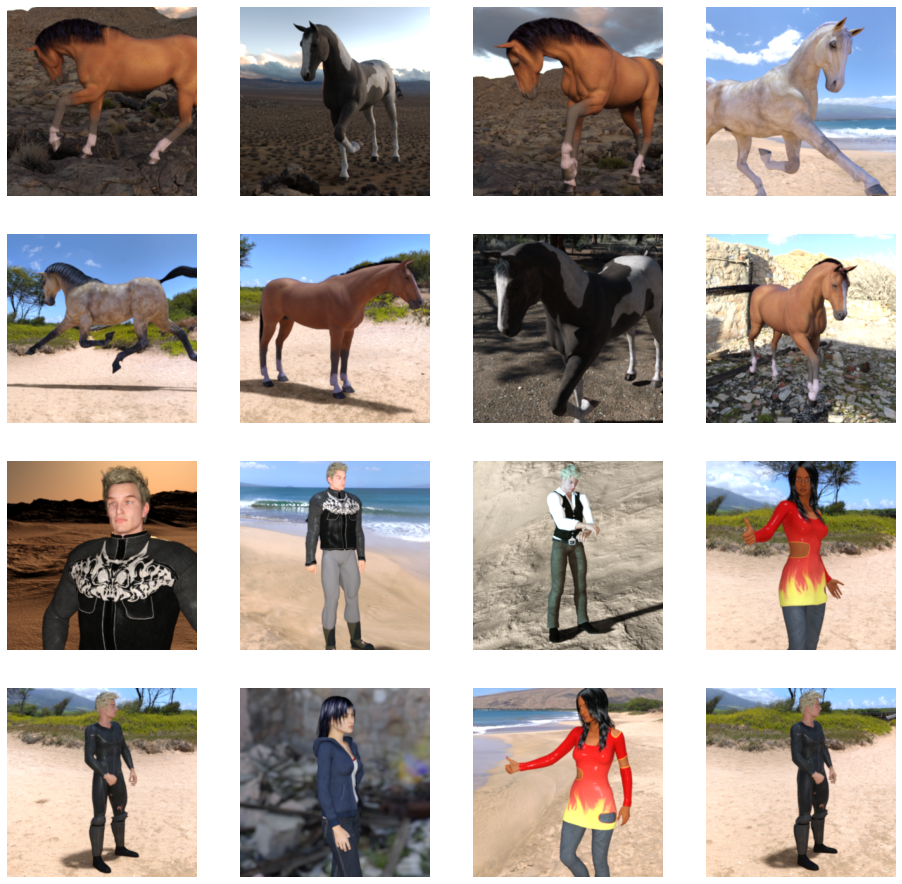

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [
    os.path.join(train_horse_dir, fname)
    for fname in train_horse_names[pic_index-8:pic_index]
]
next_human_pix = [
    os.path.join(train_human_dir, fname)
    for fname in train_human_names[pic_index-8:pic_index]
]

print('next horse pix :', next_horse_pix)
print('next human pix :', next_human_pix)

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indeices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Building a Small Model from Scratch

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 523 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a valu from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Data Preprocessing

ata that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network.

n Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen
train_generator = train_datagen.flow_from_directory(
    './horsde-or-human/', # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


# Training

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=8, # batch_size form ImageDataGenerator is 128, so that (128*8) will be cover whole training dataset
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 14s 662ms/step - loss: 0.9051 - accuracy: 0.5217
Epoch 2/15
8/8 [==============================] - 6s 743ms/step - loss: 0.6618 - accuracy: 0.6340
Epoch 3/15
8/8 [==============================] - 7s 825ms/step - loss: 1.2158 - accuracy: 0.8254
Epoch 4/15
8/8 [==============================] - 6s 737ms/step - loss: 0.3809 - accuracy: 0.8487
Epoch 5/15
8/8 [==============================] - 6s 734ms/step - loss: 0.7975 - accuracy: 0.8576
Epoch 6/15
8/8 [==============================] - 6s 732ms/step - loss: 0.2288 - accuracy: 0.9199
Epoch 7/15
8/8 [==============================] - 6s 706ms/step - loss: 0.1663 - accuracy: 0.9310
Epoch 8/15
8/8 [==============================] - 6s 734ms/step - loss: 0.3637 - accuracy: 0.8776
Epoch 9/15
8/8 [==============================] - 6s 873ms/step - loss: 0.1096 - accuracy: 0.9588
Epoch 10/15
8/8 [==============================] - 8s 840ms/step - loss: 0.4406 - accuracy: 0.8988
Epoch 11/15
8/8 [=

# Model Prediction

In [15]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' +fn
  print('path to predict : ', path)
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x /= 255
  print('\nafter normalization :')
  print(x)
  x = np.expand_dims(x, axis=0) # eg., from shape (5,) to (1,5)
  print('\nafter expand dimension :')
  print(x)
  images = np.vstack([x])
  print('\nafter vstack :')
  print(images)
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn +  "is a human")
  else:
    print(fn + "is a horse")

Saving white (2).jpg to white (2).jpg
path to predict :  /content/white (2).jpg

after normalization :
[[[0.36078432 0.36078432 0.36078432]
  [0.36078432 0.36078432 0.36078432]
  [0.3647059  0.3647059  0.3647059 ]
  ...
  [0.11372549 0.11372549 0.11372549]
  [0.11372549 0.11372549 0.11372549]
  [0.11372549 0.11372549 0.11372549]]

 [[0.34901962 0.34901962 0.35686275]
  [0.36862746 0.36862746 0.36862746]
  [0.3764706  0.3764706  0.3764706 ]
  ...
  [0.11372549 0.11372549 0.11372549]
  [0.11372549 0.11372549 0.11372549]
  [0.11372549 0.11372549 0.11372549]]

 [[0.3372549  0.3372549  0.34509805]
  [0.36862746 0.36078432 0.3647059 ]
  [0.3764706  0.3764706  0.3764706 ]
  ...
  [0.11372549 0.11372549 0.11372549]
  [0.11764706 0.11764706 0.11764706]
  [0.11372549 0.11372549 0.11372549]]

 ...

 [[0.36862746 0.36862746 0.36078432]
  [0.38039216 0.3764706  0.36862746]
  [0.4117647  0.40784314 0.4       ]
  ...
  [0.38039216 0.3764706  0.35686275]
  [0.3529412  0.33333334 0.30980393]
  [0.33333

`Safari` users will need to upload the images(s) manually in their workspace. Please follow the instructions, uncomment the code block below and run it.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below. 

In [ ]:
# # CODE BLOCK FOR SAFARI USERS

# import numpy as np
# from keras.preprocessing import image
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = image.load_img(path, target_size=(300, 300))
#  x = image.img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a human")
#  else:
#    print(i + " is a horse")

### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


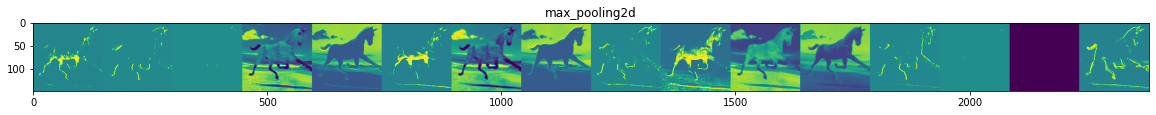

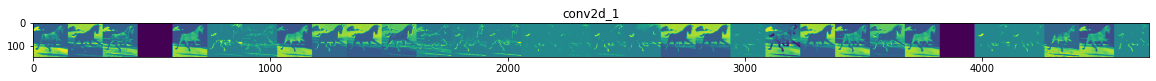

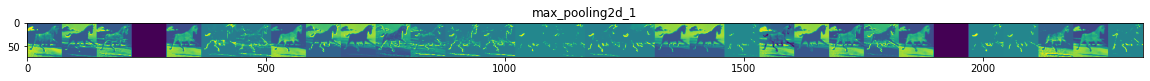

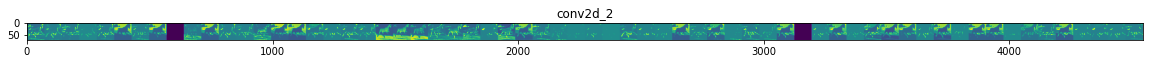

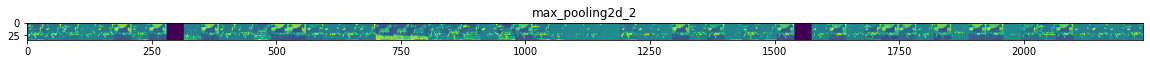

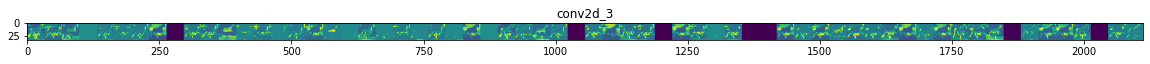

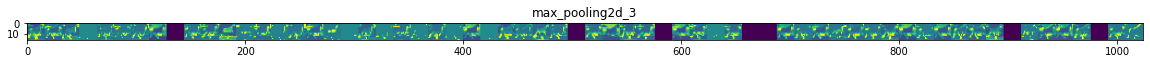

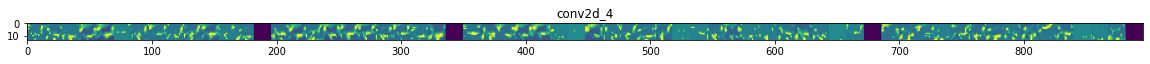

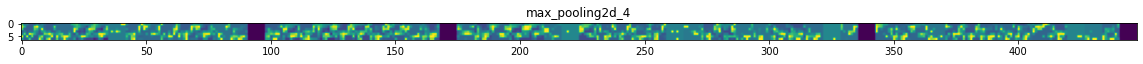

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid. 

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called _representation sparsity_ and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

## Clean Up

You will continue with a similar exercise in the next lab but before that, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)